***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.utils import resample

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


rand_state = 25

### Prepare the Training Data

In [2]:
# bring in cleaned dataset
df = pd.read_csv('data/data.csv', index_col='ptid')

# fix column names for XGBoost
df.rename(columns={'age_bucket_<55':'age_bucket_under_55', 'age_bucket_>75':'age_bucket_over_75'}, inplace=True)

# Slice the persistent and non-persistent groups
non_persistency = df[df["persistency_flag"] == 0]
persistency     = df[df["persistency_flag"] == 1]

# select the appropriate number of non-persistent subjects
select_non_persistent = resample(non_persistency,
                           replace=False,
                           n_samples=len(persistency),
                           random_state=rand_state)

balanced_df = pd.concat([persistency, select_non_persistent])

In [3]:
def prep_data(data):
    X = data.drop("persistency_flag", axis=1)
    y = data["persistency_flag"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand_state)

    return (X, y, X_train, X_test, y_train, y_test)

In [4]:
X, y, train_features, test_features, train_labels, test_labels = prep_data(balanced_df)

# Random Forest Tuning

train set acc: 0.98 test set acc: 0.8


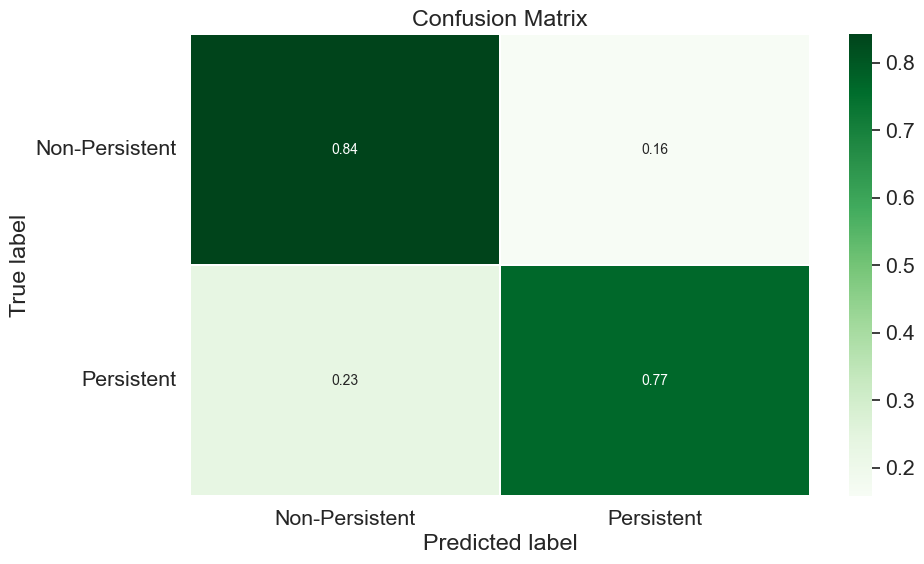


Confusion matrix: 
[[336  63]
 [ 93 306]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       399
           1       0.83      0.77      0.80       399

    accuracy                           0.80       798
   macro avg       0.81      0.80      0.80       798
weighted avg       0.81      0.80      0.80       798



In [5]:
X, y, X_train, X_test, y_train, y_test = prep_data(balanced_df)

model = RandomForestClassifier(
            criterion = 'entropy',
            n_estimators = 100,
            n_jobs = -1,
            max_depth = 15,
            random_state = rand_state)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"train set acc: {round(train_acc,2)} test set acc: {round(test_acc,2)}")


cm = confusion_matrix(y_test, y_pred)
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plot results
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Label quadrants
class_names = ["Non-Persistent","Persistent"]
tick_marks = np.arange(len(class_names))+0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

print(f"\nConfusion matrix: \n{cm}")
print(classification_report(y_test, y_pred)) # , target_names=class_names
